# Credit Card fraud detection


## Data collection
The data from this project I will get from open sources, specifically Kaggle. For this I will use my Kaggle API credentials and the dataset is called "Credit Card Fraud Detection" https://www.kaggle.com/mlg-ulb/creditcardfraud.

In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries    3KB  2022-01-15 07:06:09           3862  
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                       3GB  2022-02-05 20:51:56            943  
yasserh/wine-quality-dataset                                Wine Quality Dataset                              21KB  2022-01-15 19:15:11           4109  
majyhain/height-of-male-and-female-by-country-2022          Height of Male and Female by Country 2022          4KB  2022-02-02 00:40:19           1446  
sanjeetsinghnaik/top-1000-highest-grossing-movies           Top 1000 Highest Gross

In [ ]:
! kaggle datasets download mlg-ulb/creditcardfraud

 86% 57.0M/66.0M [00:01<00:00, 36.9MB/s]
100% 66.0M/66.0M [00:01<00:00, 39.1MB/s]


In [ ]:
! mkdir train

## Data understanding

Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

### Loading the data

In [ ]:
data = pd.read_csv("train/creditcard.csv")

### Observing data

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(data.shape)
print(data.describe)

(284807, 31)
<bound method NDFrame.describe of             Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]>


There are 284807 records and 31 columns in this dataset. Valid and fraud credit card cases are labeled as 0 and 1 in "Class" column. Now I want to know number of fraud and valid cases, and the fraction between those 2 values

In [ ]:
fraud = data[data["Class"] == 1]
valid = data[data["Class"] == 0]
# Fraction of fraud cases to valid cases
fraction = len(fraud)/float(len(valid))
print('Number of fraud cases are {}'.format(len(fraud)))
print('Number of valid cases are {}'.format(len(valid)))
print('Fraction between fraud and valid cases are {}'.format(fraction))

Number of fraud cases are 492
Number of valid cases are 284315
Fraction between fraud and valid cases are 0.0017304750013189597


We see that there are 492 fraud cases and 284315 valid cases and the fraction is only 0.17%. Such a small amount of fraud cases makes this dataset unbalanced and can harm the training of ML model that I will implement. For now I will try to train the model on this unbalanced dataset and if the performance of the model will be low, I will balance the data

In [ ]:
print("Data details in the fraud cases")
fraud.Amount.describe()

Data details in the fraud cases


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
print("Data details in the valid cases")
valid.Amount.describe()

Data details in the valid cases


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

From these two details we can see that the average amount of money in the fraudulent transactions are higher than in valid transactions

#### Correlation matrix
Correlation matrix between the features of the dataset can help us to find out most important features in detecting fraudulent transactions

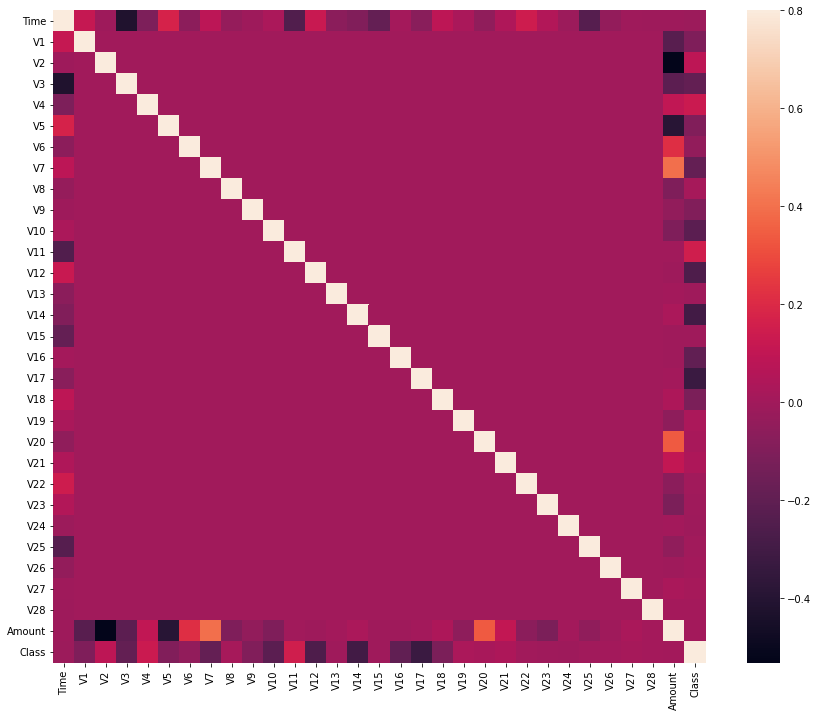

In [ ]:
# Implementing correlation matrix 
corr_matrix = data.corr()
fig = plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, vmax = 0.8, square = True)
plt.show()

In the heatmap if the color is brighter, than there is a stronger positive correlation and if the color is darker, than there is a strong negative correlation. From our heatmap we can see that there is mostly 0 correlation or no correlation between the majority of features in our dataset. Hovewer, there is a strong positive correlation between "Amount" feature and "V7" and "V20" features and strong negative correlation between "Amount" and "V2", "V5".

#### Separating X and Y values
It is important to separate input and output values in the dataset

In [ ]:
X = data.drop(["Class"], axis = 1)
Y = data["Class"]

X.shape, Y.shape

((284807, 30), (284807,))

To simplify processing for us, it is important to get only the values without columns. 

In [ ]:
X_data = X.values
Y_data = Y.values
print(X_data)
print(Y_data)

[[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]
[0 0 0 ... 0 0 0]


X_data and Y_data are numpy arrays with no columns


#### Splitting training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42);
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(227845, 30) (227845,)
(56962, 30) (56962,)


We see that there are 227845 records in the training set and 56962 records in the test set

## Building ML model

### Implementing Random Forest Classifier model

For this project, I will implement RandomForest Classifier. The principle by which Random Forest Classifier works is that it fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = random_forest.predict(x_test)
y_test, y_pred

(array([1, 0, 0, ..., 0, 0, 0]), array([1, 0, 0, ..., 0, 0, 0]))

## Evaluating ML model

For the evaluation of our ML model we will use such kind of evaluating metrics as a classification_report, accuracy score, precision and recall scores, f1 score and matthews coefficient and confusion matrix

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
 
num_outliers = len(fraud)
num_errors = (y_pred != y_test).sum()
 
acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
mcc_score = matthews_corrcoef(y_test, y_pred)

print("The model used is Random Forest classifier")
print("The accuracy is {}".format(acc_score))
print("The precision is {}".format(prec_score))
print("The recall is {}".format(rec_score))
print("The F1-Score is {}".format(f1_score))
print("The Matthews correlation coefficient is{}".format(mcc_score))

The model used is Random Forest classifier
The accuracy is 0.9995962220427653
The precision is 0.9746835443037974
The recall is 0.7857142857142857
The F1-Score is 0.8700564971751412
The Matthews correlation coefficient is0.8749276812909632


### Visualizing on the Confusion Matrix

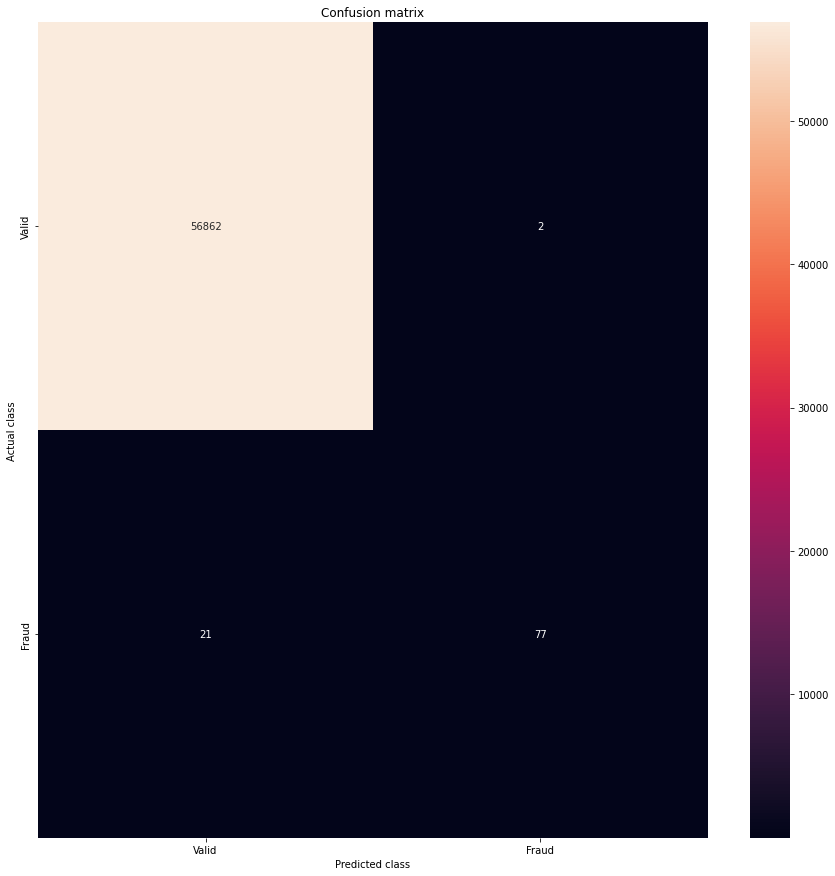

In [ ]:
labels = ["Valid", "Fraud"]

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (15, 15))
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt = "d")
plt.title("Confusion matrix")
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.show()

From the confusion matrix, we can see that there are 56862 True positive, 21 false positive, 77 True negative and 2 false negative predictions